# **Final Project part 2**

_Q1 convert numbers - defult function_

In [1]:
# demical to binary
bin(1000)[2:]

'1111101000'

In [2]:
# demical to octal
oct(1000)[2:]

'1750'

In [3]:
# demical to hexadecimal
hex(1000)[2:]

'3e8'

### load cast Data Set

In [4]:
import pandas as pd
import matplotlib as plt

In [5]:
cast = pd.read_csv(r'C:\Users\tavor\Desktop\pyton\cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22.0
1,Gangsta Rap: The Glockumentary,2007,Too $hort,actor,Himself,NaN
2,Menace II Society,1993,Too $hort,actor,Lew-Loc,27.0
3,Porndogs: The Adventures of Sadie,2009,Too $hort,actor,Bosco,3.0
4,Stop Pepper Palmer,2014,Too $hort,actor,Himself,NaN


_Question number 1:_

In [6]:
# groupby title
titles = cast.groupby("title")
# get hamlet
hamlet = titles.get_group('Hamlet')

# stay 1 row per movie
small_ham = hamlet.drop_duplicates('year')

print("There are " + str(small_ham.shape[0]) + " 'Hamlet' movies")


There are 17 'Hamlet' movies


_Question number 2:_

In [7]:
# get treasure_island
treasure_island = titles.get_group('Treasure Island')
# small DataFrame with year and title columns
treasure_island_small = treasure_island[['year', 'title']]

# sort the data and drop the duplicates values
treasure_island_small.sort_values(by='year').drop_duplicates('year')

,year,title
1312766,1918,Treasure Island
1404517,1920,Treasure Island
926924,1934,Treasure Island
1979467,1950,Treasure Island
961365,1972,Treasure Island
1954811,1973,Treasure Island
1137587,1985,Treasure Island
104905,1999,Treasure Island


_Question number 3:_

In [8]:
# use groupby to get data on the movie hamlet in his silent version from 1921
Hamlet_year = hamlet.groupby('year')
silentHamlet1921 = Hamlet_year.get_group(1921)

print("There are " + str(silentHamlet1921.shape[0]) + " rolls that credicted")

There are 9 rolls that credicted


_Question number 4:_

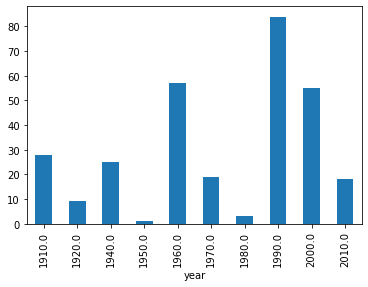

In [9]:
# hamlet from Q1
decede = cast.groupby(hamlet.year // 10 * 10).size().plot(kind='bar')  


_Question number 5:_

In [10]:
# loop to find the number of actor and actress that have main roll
for i in range(10):
    year_i = 1950 + i
    n1 = cast.loc[cast.n ==1]
    year = n1.loc[cast.year == year_i]
    actor = len(year.loc[cast.type == "actor"])
    actress = len(year.loc[cast.type == "actress"])
    print("In " + str(year_i) + " there are " + str(actor) + " available rolls for actors and " + str(actress) +" available rolls for actress")

In 1950 there are 604 available rolls for actors and 271 available rolls for actress
In 1951 there are 633 available rolls for actors and 272 available rolls for actress
In 1952 there are 591 available rolls for actors and 284 available rolls for actress
In 1953 there are 634 available rolls for actors and 290 available rolls for actress
In 1954 there are 626 available rolls for actors and 298 available rolls for actress
In 1955 there are 606 available rolls for actors and 264 available rolls for actress
In 1956 there are 614 available rolls for actors and 288 available rolls for actress
In 1957 there are 708 available rolls for actors and 284 available rolls for actress
In 1958 there are 694 available rolls for actors and 275 available rolls for actress
In 1959 there are 678 available rolls for actors and 287 available rolls for actress


_Question number 6:_

In [12]:
# DataFrame for n=1 and years since 1990
n = cast.loc[(cast['n'] == 1) & (cast['year'] >= 1990)]

# use groupby for name - each name and the numbers ot time he has n=1 since 1990 
most_n = n.groupby('name').size().sort_values(ascending=False)
# show 10 name wuth the most time n=1
most_n.iloc[:10]

name
Mohanlal              126
Mammootty             118
Akshay Kumar           87
Jayaram                76
Andy Lau               72
Ajay Devgn             69
Eric Roberts           68
Amitabh Bachchan       68
Nagarjuna Akkineni     60
Dilip                  59
dtype: int64

_Question number 7:_

In [13]:
# create Frank Oz's DataFrame
frank_oz = cast.groupby("name").get_group('Frank Oz')

# use groupby function for year and title 
frank_oz1 = frank_oz.groupby(["year", "title"]).size()

# sort the moveis that Oz did more than 1 role
frank_oz1[frank_oz1 > 1].sort_values()

year  title                                   
1981  An American Werewolf in London              2
1982  The Dark Crystal                            2
1985  Sesame Street Presents: Follow that Bird    3
1999  The Adventures of Elmo in Grouchland        3
1996  Muppet Treasure Island                      4
1999  Muppets from Space                          4
1981  The Great Muppet Caper                      6
1984  The Muppets Take Manhattan                  7
1992  The Muppet Christmas Carol                  7
1979  The Muppet Movie                            8
dtype: int64